# 薄板スプライン法

In [ ]:
!pip install ktch

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from ktch.landmark import GeneralizedProcrustesAnalysis
from ktch.landmark import tps_grid_2d_plot
from ktch.datasets import load_landmark_mosquito_wings

## mosquito wing 標識点データの読み込み

from Rohlf and Slice 1990 Syst. Zool.

In [2]:
data_landmark_mosquito_wings = load_landmark_mosquito_wings(as_frame=True)
data_landmark_mosquito_wings.coords

x       y
specimen_id coord_id                
1           0        -0.4933  0.0130
            1        -0.0777  0.0832
            2         0.2231  0.0861
            3         0.2641  0.0462
            4         0.2645  0.0261
...                      ...     ...
127         13       -0.2028  0.0371
            14        0.0490  0.0347
            15       -0.0422  0.0204
            16        0.1004 -0.0180
            17       -0.1473 -0.0057

[2286 rows x 2 columns]

## GPA

一般化プロクラステス解析のノートブック（`generalized_Procrustes_analysis.ipynb`）も参照．

In [3]:
X = data_landmark_mosquito_wings.coords.to_numpy().reshape(-1, 18 * 2)

In [4]:
gpa = GeneralizedProcrustesAnalysis(tol=10**-5)

In [5]:
X_aligned = gpa.fit_transform(X)

### 平均形状と整列した形状

In [6]:
X_reference = gpa.mu_  # 平均形状
X_target = X_aligned.reshape(-1, 18, 2)[0]  # 0番目の整列された形状

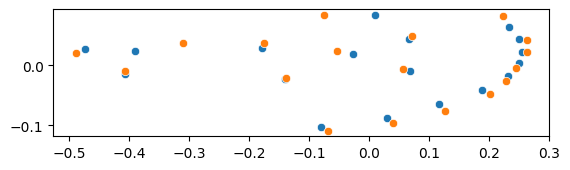

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.scatterplot(x=X_reference[:, 0], y=X_reference[:, 1], ax=ax)
sns.scatterplot(x=X_target[:, 0], y=X_target[:, 1], ax=ax)

ax.set_aspect("equal")

## 薄板スプラインに基づく変形グリッドのプロット

<Axes: >

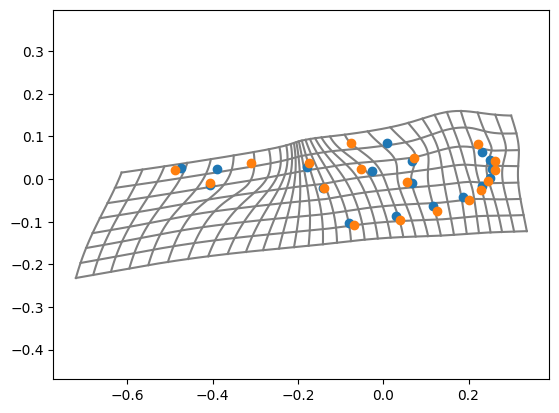

In [8]:
tps_grid_2d_plot(X_reference, X_target, outer=0.2, grid_size=0.03)